### Data Description

Specifically, she is interested with the sales in Australia. She would like to perform simple profitability analysis on the product category and sub-category, for specific year. Furthermore, she wants to have the option of going deeper to product level. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv("Lab5.csv",date_parser=True)

In [3]:
df

,Date,Month,Year,CustomerID,CustomerAge,AgeGroup,CustomerGender,Country,State,ProductCategory,SubCategory,Product,FrameSize,OrderQuantity,UnitCost,UnitPrice,Cost,Revenue,Profit
0,1/1/2011,January,2011,11455,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",46.0,1,1252,2295,1252,NaN,-1252
1,1/1/2011,January,2011,12494,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",48.0,2,2171,3578,4342,5439.0,1097
2,1/1/2011,January,2011,13148,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",44.0,1,1519,2443,1519,2419.0,900
3,1/1/2011,January,2011,16361,42,Adults (35-64),M,United_States,California,Bikes,Road Bikes,"Road-750 Black, 44",44.0,1,344,540,344,529.0,185
4,1/1/2011,January,2011,19413,39,Adults (35-64),M,United_States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",38.0,3,713,1120,2139,2621.0,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,31/7/2016,July,2016,27496,43,Adults (35-64),M,Australia,Victoria,Accessories,Tires and Tubes,HL Mountain Tire,NaN,13,13,35,169,359.0,190
113032,31/7/2016,July,2016,27686,34,Young Adults (25-34),M,Australia,New South Wales,Accessories,Tires and Tubes,Mountain Tire Tube,NaN,16,2,5,32,70.0,38
113033,31/7/2016,July,2016,27686,34,Young Adults (25-34),M,Australia,New South Wales,Accessories,Tires and Tubes,Mountain Tire Tube,NaN,8,2,5,16,35.0,19
113034,31/7/2016,July,2016,13350,54,Adults (35-64),M,Canada,British Columbia,Clothing,Vests,"Classic Vest, S",NaN,11,24,64,264,697.0,433


 Add a pivot table that shows Order Quantity, Revenue, and Profit by Product Category. Add the Year and Country field to the filter list. Add the Sub Category field to the rows of the pivot table. Filter the pivot table for Australia and 2016.

In [4]:
df.columns

Index(['Date', 'Month', 'Year', 'CustomerID', 'CustomerAge', 'AgeGroup',
       'CustomerGender', 'Country', 'State', 'ProductCategory', 'SubCategory',
       'Product', 'FrameSize', 'OrderQuantity', 'UnitCost', 'UnitPrice',
       'Cost', 'Revenue', 'Profit'],
      dtype='object')

In [5]:
df = df[['ProductCategory', 'SubCategory','Product','Year','Country','Revenue', 'Profit']]

In [6]:
df

,ProductCategory,SubCategory,Product,Year,Country,Revenue,Profit
0,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2011,Australia,NaN,-1252
1,Bikes,Road Bikes,"Road-150 Red, 48",2011,France,5439.0,1097
2,Bikes,Road Bikes,"Road-250 Red, 44",2011,Canada,2419.0,900
3,Bikes,Road Bikes,"Road-750 Black, 44",2011,United_States,529.0,185
4,Bikes,Road Bikes,"Road-550-W Yellow, 38",2011,United_States,2621.0,482
...,...,...,...,...,...,...,...
113031,Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,359.0,190
113032,Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,70.0,38
113033,Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,35.0,19
113034,Clothing,Vests,"Classic Vest, S",2016,Canada,697.0,433


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ProductCategory  113036 non-null  object 
 1   SubCategory      113036 non-null  object 
 2   Product          113036 non-null  object 
 3   Year             113036 non-null  int64  
 4   Country          113036 non-null  object 
 5   Revenue          113035 non-null  float64
 6   Profit           113036 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.0+ MB


In [8]:
df.isnull().sum()

ProductCategory    0
SubCategory        0
Product            0
Year               0
Country            0
Revenue            1
Profit             0
dtype: int64

In [9]:
df.fillna(0)

,ProductCategory,SubCategory,Product,Year,Country,Revenue,Profit
0,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2011,Australia,0.0,-1252
1,Bikes,Road Bikes,"Road-150 Red, 48",2011,France,5439.0,1097
2,Bikes,Road Bikes,"Road-250 Red, 44",2011,Canada,2419.0,900
3,Bikes,Road Bikes,"Road-750 Black, 44",2011,United_States,529.0,185
4,Bikes,Road Bikes,"Road-550-W Yellow, 38",2011,United_States,2621.0,482
...,...,...,...,...,...,...,...
113031,Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,359.0,190
113032,Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,70.0,38
113033,Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,35.0,19
113034,Clothing,Vests,"Classic Vest, S",2016,Canada,697.0,433


In [10]:
df.isnull().sum()

ProductCategory    0
SubCategory        0
Product            0
Year               0
Country            0
Revenue            1
Profit             0
dtype: int64

In [11]:
df1 = df.set_index('ProductCategory')

In [12]:
df1

,SubCategory,Product,Year,Country,Revenue,Profit
ProductCategory,,,,,,
Bikes,Mountain Bikes,"Mountain-200 Black, 46",2011,Australia,NaN,-1252
Bikes,Road Bikes,"Road-150 Red, 48",2011,France,5439.0,1097
Bikes,Road Bikes,"Road-250 Red, 44",2011,Canada,2419.0,900
Bikes,Road Bikes,"Road-750 Black, 44",2011,United_States,529.0,185
Bikes,Road Bikes,"Road-550-W Yellow, 38",2011,United_States,2621.0,482
...,...,...,...,...,...,...
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,359.0,190
Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,70.0,38
Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,35.0,19


In [13]:
df1['Year'].value_counts()

2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

In [14]:
df1['Country'].value_counts()

United_States     39206
Australia         23936
Canada            14178
United_Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [15]:
aust = df1[df1['Country'] == 'Australia']

In [16]:
aust

,SubCategory,Product,Year,Country,Revenue,Profit
ProductCategory,,,,,,
Bikes,Mountain Bikes,"Mountain-200 Black, 46",2011,Australia,NaN,-1252
Bikes,Road Bikes,"Road-250 Red, 58",2011,Australia,6156.0,1491
Bikes,Road Bikes,"Road-550-W Yellow, 40",2011,Australia,3539.0,687
Bikes,Road Bikes,"Road-750 Black, 48",2011,Australia,886.0,198
Bikes,Road Bikes,"Road-550-W Yellow, 44",2011,Australia,918.0,205
...,...,...,...,...,...,...
Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,4.0,2
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,802.0,425
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,359.0,190


In [17]:
aust2016 = aust[aust['Year'] == 2016]

In [18]:
aust2016

,SubCategory,Product,Year,Country,Revenue,Profit
ProductCategory,,,,,,
Accessories,Bike Racks,Hitch Rack - 4-Bike,2016,Australia,626.0,356
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,91.0,55
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,60.0,36
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,8.0,5
Accessories,Bottles and Cages,Water Bottle - 30 oz.,2016,Australia,84.0,44
...,...,...,...,...,...,...
Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,4.0,2
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,802.0,425
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,359.0,190


In [19]:
aust2016['Margin'] = aust2016['Profit'] / aust2016['Revenue']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
aust2016

,SubCategory,Product,Year,Country,Revenue,Profit,Margin
ProductCategory,,,,,,,
Accessories,Bike Racks,Hitch Rack - 4-Bike,2016,Australia,626.0,356,0.568690
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,91.0,55,0.604396
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,60.0,36,0.600000
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,8.0,5,0.625000
Accessories,Bottles and Cages,Water Bottle - 30 oz.,2016,Australia,84.0,44,0.523810
...,...,...,...,...,...,...,...
Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,4.0,2,0.500000
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,802.0,425,0.529925
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,359.0,190,0.529248


In [21]:
aust2016['Margin'] = round(aust2016['Margin'],2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
aust2016

,SubCategory,Product,Year,Country,Revenue,Profit,Margin
ProductCategory,,,,,,,
Accessories,Bike Racks,Hitch Rack - 4-Bike,2016,Australia,626.0,356,0.57
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,91.0,55,0.60
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,60.0,36,0.60
Accessories,Bottles and Cages,Road Bottle Cage,2016,Australia,8.0,5,0.62
Accessories,Bottles and Cages,Water Bottle - 30 oz.,2016,Australia,84.0,44,0.52
...,...,...,...,...,...,...,...
Accessories,Tires and Tubes,Mountain Tire Tube,2016,Australia,4.0,2,0.50
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,802.0,425,0.53
Accessories,Tires and Tubes,HL Mountain Tire,2016,Australia,359.0,190,0.53


Now, apply Color scales conditional formatting to Margin for the Sub Category level. 

In [23]:
aust2016['SubCategory'].value_counts()

Tires and Tubes      1842
Bottles and Cages     925
Helmets               652
Road Bikes            529
Jerseys               327
Caps                  253
Mountain Bikes        249
Touring Bikes         208
Fenders               174
Gloves                163
Cleaners              122
Hydration Packs        92
Shorts                 64
Vests                  59
Socks                  58
Bike Racks             30
Bike Stands            27
Name: SubCategory, dtype: int64

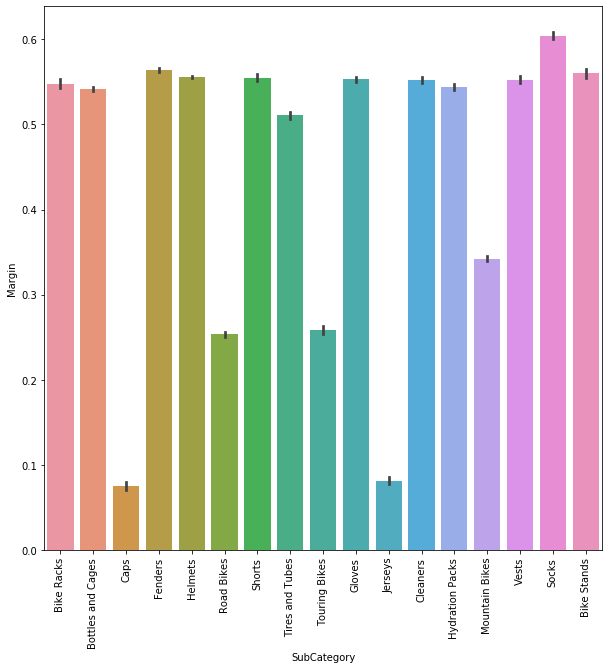

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x=aust2016['SubCategory'],y=aust2016['Margin'])
plt.xticks(rotation =90)

plt.show()

Apply Color scales conditional formatting only to the cells showing the margin for the Product.

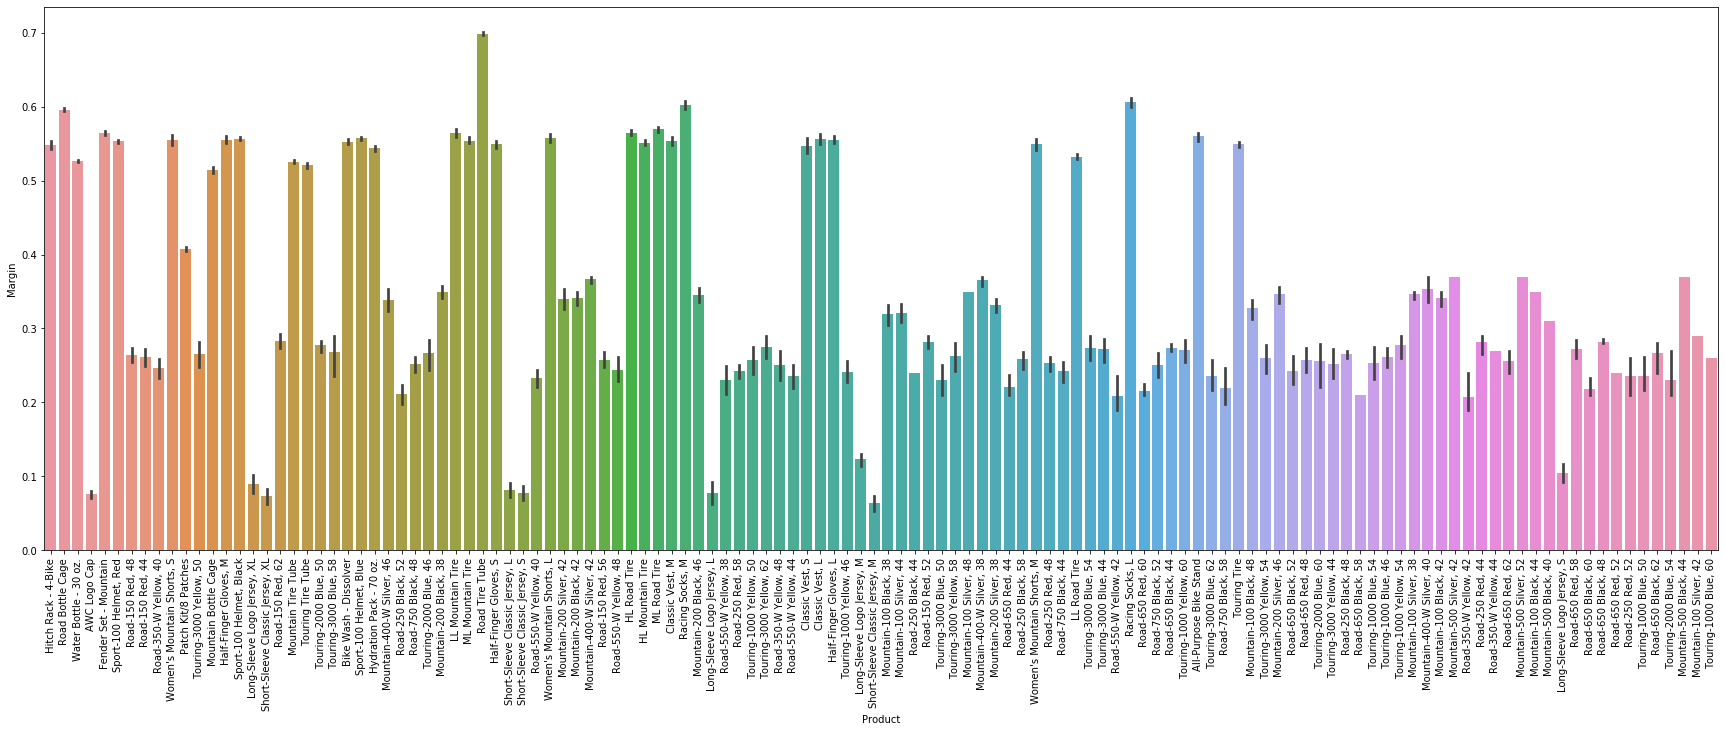

In [25]:
plt.figure(figsize=(30,10))
sns.barplot(x=aust2016['Product'],y=aust2016['Margin'])
plt.xticks(rotation =90)

plt.show()